# 結果

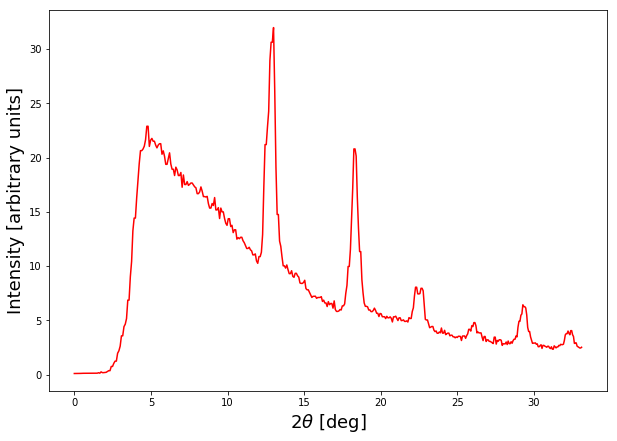

In [11]:
# -*- coding: utf-8 -*-
%matplotlib inline

# import
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from math import *

# data_input
df0 = pd.read_csv('0510_07_KCl.csv', header= 0)

angle = np.array(df0["Angle"])
intensity = np.array(df0["Intensity"])

# data plot
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

x_mean = 3.14
x_ustd = 2.27

ax1.plot(two_thita_deg[:450], intensity, "r")


ax1.set_xlabel(r"2$\theta$ [deg]", fontsize=18)
ax1.set_ylabel("Intensity [arbitrary units]", fontsize=18)

plt.savefig("KCl_plot")

plt.show()

In [25]:
xlay_wavelengh = 0.711
lattice_constant = 6.28

num = ["200","220","222","400","420","422"]
name= ["two_theta", "distance", "value"]

theta =[paramater_optimal[i] for i in range(4,20,3)]
distance =[lattice_constant/sqrt(4), lattice_constant/sqrt(8),lattice_constant/sqrt(12), 
           lattice_constant/sqrt(16), lattice_constant/sqrt(20),lattice_constant/sqrt(24)]
value =[paramater_optimal[i]**2 for i in range(2,20,3)]

df_KCl = pd.DataFrame([theta, distance, value], index= name, columns= num)

print(df_KCl)

                  200        220        222        400        420        422
two_theta   12.848988  18.314135  22.483611  26.070175  29.320779  32.312745
distance     3.140000   2.220315   1.812880   1.570000   1.404251   1.281900
value      211.822263  60.561554   7.789260   0.297566   3.369641   1.135681


In [ ]:
F = [paramater_optimal[i] for i in range(2,20,3)]
I = {'200': F[0]**2, '220': F[1]**2, '222': F[2]**2, '400': F[3]**2, '420': F[4]**2, '422': F[5]**2}

points = np.arange(-1,1.01,0.01,dtype= np.complex)
dx,dy = np.meshgrid(points,points)

data = []

'''
    p1_r = np.exp(-2*pi*1.j*(dx+dy+dz)) +\
           np.exp(-2*pi*1.j*(dx+dy-dz)) +\
           np.exp(-2*pi*1.j*(dx-dy+dz)) +\
           np.exp(-2*pi*1.j*(-dx+dy+dz)) +\
           np.exp(-2*pi*1.j*(dx-dy-dz)) +\
           np.exp(-2*pi*1.j*(-dx+dy-dz)) +\
           np.exp(-2*pi*1.j*(-dx-dy+dz)) +\
           np.exp(-2*pi*1.j*(-dx-dy-dz))
    p1 = np.sqrt(I['111']/8)*p1_r
'''        
      

for dz in points:
  
    p2_r = np.exp(-4*pi*1.j*dx) + np.exp(4*np.pi*1.j*dx) +\
           np.exp(-4*pi*1.j*dy) + np.exp(4*np.pi*1.j*dy) +\
           np.exp(-4*pi*1.j*dz) + np.exp(4*np.pi*1.j*dz) 
    p2 = np.sqrt(I['200']/6)*p2_r
    
    
    p3_r = np.exp(-4*pi*1.j*(dx+dy))+\
           np.exp(-4*pi*1.j*(dx+dz))+\
           np.exp(-4*pi*1.j*(dx-dy))+\
           np.exp(-4*pi*1.j*(dx-dz))+\
           np.exp(-4*pi*1.j*(-dx+dy))+\
           np.exp(-4*pi*1.j*(-dx+dz))+\
           np.exp(-4*pi*1.j*(-dx-dy))+\
           np.exp(-4*pi*1.j*(-dx-dz))+\
           np.exp(-4*pi*1.j*(dy+dz))+\
           np.exp(-4*pi*1.j*(-dy-dz))+\
           np.exp(-4*pi*1.j*(dy-dz))+\
           np.exp(-4*pi*1.j*(-dy+dz))
           
    p3 = np.sqrt(I['220']/12)*p3_r
    
    p4_r = np.exp(-4*pi*1.j*(dx+dy+dz))+\
           np.exp(-4*pi*1.j*(dx+dy-dz))+\
           np.exp(-4*pi*1.j*(dx-dy+dz))+\
           np.exp(-4*pi*1.j*(-dx+dy+dz))+\
           np.exp(-4*pi*1.j*(dx-dy-dz))+\
           np.exp(-4*pi*1.j*(-dx+dy-dz))+\
           np.exp(-4*pi*1.j*(-dx-dy+dz))+\
           np.exp(-4*pi*1.j*(-dx-dy-dz)) 

    p4 = np.sqrt(I['222']/8)*p4_r
    

    
    p5_r = np.exp(-8*pi*1.j*dx) + np.exp(8*np.pi*1.j*dx) +\
           np.exp(-8*pi*1.j*dy) + np.exp(8*np.pi*1.j*dy) +\
           np.exp(-8*pi*1.j*dz) + np.exp(8*np.pi*1.j*dz) 
    p5 = np.sqrt(I['400']/6)*p5_r
    
    
    p6_r = np.exp(-4*pi*1.j*(2*dx+dy))+\
           np.exp(-4*pi*1.j*(2*dx+dz))+\
           np.exp(-4*pi*1.j*(2*dx-dy))+\
           np.exp(-4*pi*1.j*(2*dx-dz))+\
           np.exp(-4*pi*1.j*(dx+2*dy))+\
           np.exp(-4*pi*1.j*(dx+2*dz))+\
           np.exp(-4*pi*1.j*(dx-2*dy))+\
           np.exp(-4*pi*1.j*(dx-2*dz))+\
           np.exp(-4*pi*1.j*(dy+2*dz))+\
           np.exp(-4*pi*1.j*(dy-2*dz))+\
           np.exp(-4*pi*1.j*(-dy+2*dz))+\
           np.exp(-4*pi*1.j*(-dy-2*dz))+\
           np.exp(-4*pi*1.j*(2*dy+dz))+\
           np.exp(-4*pi*1.j*(2*dy-dz))+\
           np.exp(-4*pi*1.j*(-2*dy+dz))+\
           np.exp(-4*pi*1.j*(-2*dy-dz))
    p6 = np.sqrt(I['420']/12)*p6_r
    
   
    p7_r = np.exp(-2*pi*1.j*(4*dx+2*dy+2*dz))+\
           np.exp(-2*pi*1.j*(4*dx+2*dy-2*dz))+\
           np.exp(-2*pi*1.j*(4*dx-2*dy+2*dz))+\
           np.exp(-2*pi*1.j*(4*dx-2*dy-2*dz))+\
           np.exp(-2*pi*1.j*(-4*dx+2*dy+2*dz))+\
           np.exp(-2*pi*1.j*(-4*dx+2*dy-2*dz))+\
           np.exp(-2*pi*1.j*(-4*dx-2*dy+2*dz))+\
           np.exp(-2*pi*1.j*(-4*dx-2*dy-2*dz))+\
           np.exp(-2*pi*1.j*(4*dy+2*dx+2*dz))+\
           np.exp(-2*pi*1.j*(4*dy+2*dx-2*dz))+\
           np.exp(-2*pi*1.j*(4*dy-2*dx+2*dz))+\
           np.exp(-2*pi*1.j*(4*dy-2*dx-2*dz))+\
           np.exp(-2*pi*1.j*(-4*dy+2*dx+2*dz))+\
           np.exp(-2*pi*1.j*(-4*dy+2*dx-2*dz))+\
           np.exp(-2*pi*1.j*(-4*dy-2*dx+2*dz))+\
           np.exp(-2*pi*1.j*(-4*dy-2*dx-2*dz))+\
           np.exp(-2*pi*1.j*(4*dz+2*dx+2*dy))+\
           np.exp(-2*pi*1.j*(4*dz+2*dx-2*dy))+\
           np.exp(-2*pi*1.j*(4*dz-2*dx+2*dy))+\
           np.exp(-2*pi*1.j*(4*dz-2*dx-2*dy))+\
           np.exp(-2*pi*1.j*(-4*dz+2*dx+2*dy))+\
           np.exp(-2*pi*1.j*(-4*dz+2*dx-2*dy))+\
           np.exp(-2*pi*1.j*(-4*dz-2*dx+2*dy))+\
           np.exp(-2*pi*1.j*(-4*dz-2*dx-2*dy))
          
    p7 = np.sqrt(I['422']/24)*p7_r

    
    
    p = p2 + p3 + p4 + p5 + p6 + p7
    
    
    data.append(p)



-1=< z =< 1 : 0


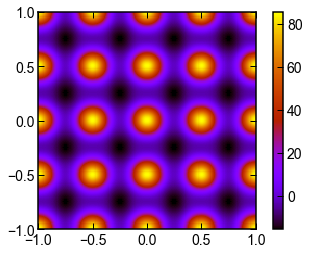

In [23]:
number = int(float(input("-1=< z =< 1 : "))*100+100)
plt.imshow(np.real(data[number]), cmap="gnuplot",extent=[-1,1,-1,1])

plt.colorbar()
plt.savefig("KCl_im00")

-1=< z =< 1 : 0.5


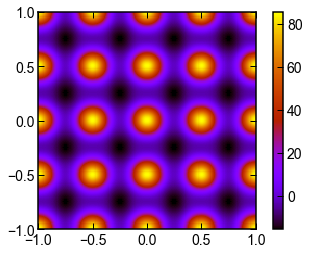

In [24]:
number = int(float(input("-1=< z =< 1 : "))*100+100)
plt.imshow(np.real(data[number]), cmap="gnuplot",extent=[-1,1,-1,1])

plt.colorbar()
plt.savefig("KCl_im05")

# 完成版 (fitting)

In [17]:
# -*- coding: utf-8 -*-
%matplotlib inline

# import
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from math import *

In [18]:

# -*- coding: utf-8 -*-
%matplotlib inline

# import
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from math import *

# data_input
df0 = pd.read_csv('0510_07_KCl.csv', header= 0)

angle = np.array(df0["Angle"])
intensity = np.array(df0["Intensity"])

#[31.8, 31.97]
distance = 6.28/2 #6.28は格子定数
rad = asin(0.711/(2*distance)) #0.711はX線の波長
deg = degrees(rad)
print("degree is : " + str(deg))

alpha = tan(2*rad)/31.8 #31.8はX線の波長
print("alpha  is : "+ str(alpha))

two_thita_deg = [degrees(atan(alpha*ang)) for ang in angle]


# function_define
def linear(x, a, b):
    return a*np.exp(-b)
    
def gauss(x, a, sigma, mean):
    return a / np.sqrt(2.0*np.pi) / sigma * np.exp(-((x-mean)/sigma)**2/2)


def fitting(x, *paramaters):
    a0, b0, a1, sigma1, mean1, a2, sigma2, mean2, a3, sigma3, mean3, a4, sigma4, mean4, a5, sigma5, mean5, a6, sigma6, mean6  = paramaters
    return linear(x, a0, b0) + \
           gauss(x, a1, sigma1, mean1) + \
           gauss(x, a2, sigma2, mean2) + \
           gauss(x, a3, sigma3, mean3) + \
           gauss(x, a4, sigma4, mean4) + \
           gauss(x, a5, sigma5, mean5) + \
           gauss(x, a6, sigma6, mean6) 
        
# initial
initial_gauss0 = 30., 0.06,
initial_gauss1 = 35., 0.25 , 13. #a1, sigma1, mean1
initial_gauss2 = 23., 0.25 , 19. #a2, sigma2, mean2
initial_gauss3 = 8. , 0.25 , 23. #a3, sigma3, mean3
initial_gauss4 = 5. , 0.2 , 26.
initial_gauss5 = 7. , 0.2 , 29.
initial_gauss6 = 4. , 0.2 , 33.

initial_parameter = initial_gauss0 + initial_gauss1 + initial_gauss2 + initial_gauss3 + \
                    initial_gauss4 + initial_gauss5 + initial_gauss6
# action

one = 90
end= 453

paramater_optimal, covariance = curve_fit(fitting, two_thita_deg[one:], intensity[one:], initial_parameter)
print(paramater_optimal)


#matplotlibの設定
plt.rc('font', family='Arial', size=14) #フォントの設定
plt.rc('xtick.major', width=1, size=6) #x軸の主目盛りの設定
plt.rc('xtick', direction='in', top=True) #x軸目盛りの向き、上側に表示するか
plt.rc('ytick.major', width=1, size=6) #y軸の主目盛りの設定
plt.rc('ytick', direction='in', right=True) #y軸目盛りの向き、右側に表示するか
plt.rc('axes', linewidth=1.5) #枠線の太さ
plt.rc('lines', linewidth=1.0) #プロットの太さ

#今回は、Axes が一つしかないので fig, ax1 = plt.subplots() の方が簡素。
#慣例として ax1 を用いるが、df 同様に意味のある変数名にすべき。
fig = plt.figure(figsize=(8, 6), dpi=80)
gs = gridspec.GridSpec(1, 1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(two_thita_deg, intensity)
ax1.yaxis.set_data_interval(0, 100)

ax1.plot(two_thita_deg[one:], fitting(two_thita_deg[one:], *paramater_optimal))
fig.tight_layout() #グラフ描画前に行うべし。慣例では、fig.tight_layout()
plt.show()



degree is : 6.500769660037673
alpha  is : 0.007260895895489536


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 4200.

degree is : 6.500769660037673
alpha  is : 0.007260895895489536
[ -0.0982545  -57.13641504   1.06568347   0.27113426  32.31274472]


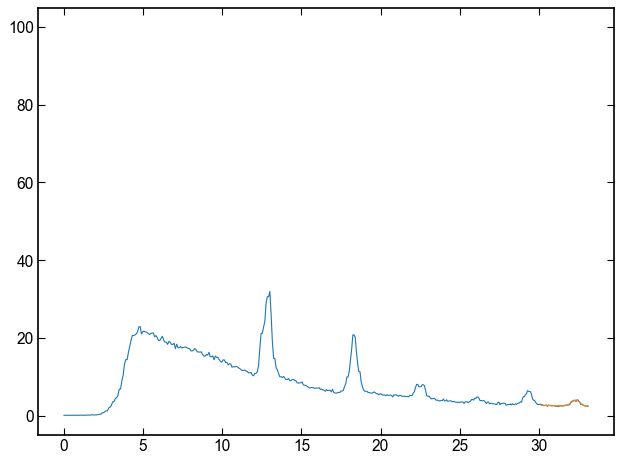

In [19]:

# -*- coding: utf-8 -*-
%matplotlib inline

# import
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from math import *

# data_input
df0 = pd.read_csv('0510_07_KCl.csv', header= 0)

angle = np.array(df0["Angle"])
intensity = np.array(df0["Intensity"])

#[31.8, 31.97]
distance = 6.28/2 #6.28は格子定数
rad = asin(0.711/(2*distance)) #0.711はX線の波長
deg = degrees(rad)
print("degree is : " + str(deg))

alpha = tan(2*rad)/31.8 #31.8はX線の波長
print("alpha  is : "+ str(alpha))

two_thita_deg = [degrees(atan(alpha*ang)) for ang in angle]


# function_define
def linear(x, a, b):
    return a* (x + b)
    
def gauss(x, a, sigma, mean):
    return a / np.sqrt(2.0*np.pi) / sigma * np.exp(-((x-mean)/sigma)**2/2)


def fitting(x, *paramaters):
    a0, b0, a1, sigma1, mean1 = paramaters
    return linear(x, a0, b0) + \
           gauss(x, a1, sigma1, mean1) 
        
# initial
initial_gauss0 = -0.42098352, -36.70476744
#initial_gauss1 = 14.554115, 0.28118231,  12.84898759 #a1, sigma1, mean1
#initial_gauss2 = 7.78213044, 0.22429571,  18.31413547 #a2, sigma2, mean2
#initial_gauss3 = 2.79092464, 0.30769023,  22.48361133 #a3, sigma3, mean3
#initial_gauss4 = 0.54549612, 0.1980757,   26.0701745
#initial_gauss5 = 1.83565819,   0.22457326,  29.32077862
initial_gauss6 = 1.06568348,   0.27113426,  32.31274472

initial_parameter = initial_gauss0 + initial_gauss6 

# action

one = 400
end= 453

paramater_optimal, covariance = curve_fit(fitting, two_thita_deg[one:], intensity[one:], initial_parameter)
print(paramater_optimal)


#matplotlibの設定
plt.rc('font', family='Arial', size=14) #フォントの設定
plt.rc('xtick.major', width=1, size=6) #x軸の主目盛りの設定
plt.rc('xtick', direction='in', top=True) #x軸目盛りの向き、上側に表示するか
plt.rc('ytick.major', width=1, size=6) #y軸の主目盛りの設定
plt.rc('ytick', direction='in', right=True) #y軸目盛りの向き、右側に表示するか
plt.rc('axes', linewidth=1.5) #枠線の太さ
plt.rc('lines', linewidth=1.0) #プロットの太さ

#今回は、Axes が一つしかないので fig, ax1 = plt.subplots() の方が簡素。
#慣例として ax1 を用いるが、df 同様に意味のある変数名にすべき。
fig = plt.figure(figsize=(8, 6), dpi=80)
gs = gridspec.GridSpec(1, 1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(two_thita_deg, intensity)
ax1.yaxis.set_data_interval(0, 100)


ax1.plot(two_thita_deg[one:], fitting(two_thita_deg[one:], *paramater_optimal))
fig.tight_layout() #グラフ描画前に行うべし。慣例では、fig.tight_layout()
plt.show()




In [20]:
paramater_optimal = [-0.42098352, -36.70476744, 
                     14.554115, 0.28118231,  12.84898759, 
                     7.78213044, 0.22429571,  18.31413547,
                     2.79092464, 0.30769023,  22.48361133,
                     0.54549612, 0.1980757,   26.0701745,
                     1.83565819,   0.22457326,  29.32077862,
                     1.06568348,   0.27113426,  32.31274472]

print(paramater_optimal)

[-0.42098352, -36.70476744, 14.554115, 0.28118231, 12.84898759, 7.78213044, 0.22429571, 18.31413547, 2.79092464, 0.30769023, 22.48361133, 0.54549612, 0.1980757, 26.0701745, 1.83565819, 0.22457326, 29.32077862, 1.06568348, 0.27113426, 32.31274472]


# 完成版(KCl)

# 積分強度

In [21]:
from scipy import integrate


result = []
def gauss(x, a, sigma, mean):
    return a / np.sqrt(2.0*np.pi) / sigma * np.exp(-((x-mean)/sigma)**2/2)

value = []
for i in range(2,20,3):
    value.append(paramater_optimal[i])
    hoge, error = integrate.quad(lambda x:gauss(x,paramater_optimal[i],+ \
                               paramater_optimal[i+1] ,paramater_optimal[i+2]),0,40)
    result.append(hoge)

print(value)
print(result)

[14.554115, 7.78213044, 2.79092464, 0.54549612, 1.83565819, 1.06568348]
[14.554115, 7.782130439999979, 2.790924640000002, 0.5454961199999998, 1.8356581900000015, 1.0656834800000023]


# 完成版(KCl)


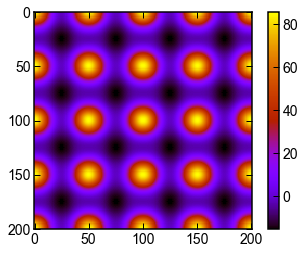

In [22]:
F = [paramater_optimal[i] for i in range(2,20,3)]
I = {'200': F[0]**2, '220': F[1]**2, '222': F[2]**2, '400': F[3]**2, '420': F[4]**2, '422': F[5]**2}

points = np.arange(-1,1.01,0.01,dtype= np.complex)
dx,dy = np.meshgrid(points,points)

data = []

'''
    p1_r = np.exp(-2*pi*1.j*(dx+dy+dz)) +\
           np.exp(-2*pi*1.j*(dx+dy-dz)) +\
           np.exp(-2*pi*1.j*(dx-dy+dz)) +\
           np.exp(-2*pi*1.j*(-dx+dy+dz)) +\
           np.exp(-2*pi*1.j*(dx-dy-dz)) +\
           np.exp(-2*pi*1.j*(-dx+dy-dz)) +\
           np.exp(-2*pi*1.j*(-dx-dy+dz)) +\
           np.exp(-2*pi*1.j*(-dx-dy-dz))
    p1 = np.sqrt(I['111']/8)*p1_r
'''        
      

for dz in points:
  
    p2_r = np.exp(-4*pi*1.j*dx) + np.exp(4*np.pi*1.j*dx) +\
           np.exp(-4*pi*1.j*dy) + np.exp(4*np.pi*1.j*dy) +\
           np.exp(-4*pi*1.j*dz) + np.exp(4*np.pi*1.j*dz) 
    p2 = np.sqrt(I['200']/6)*p2_r
    
    
    p3_r = np.exp(-4*pi*1.j*(dx+dy))+\
           np.exp(-4*pi*1.j*(dx+dz))+\
           np.exp(-4*pi*1.j*(dx-dy))+\
           np.exp(-4*pi*1.j*(dx-dz))+\
           np.exp(-4*pi*1.j*(-dx+dy))+\
           np.exp(-4*pi*1.j*(-dx+dz))+\
           np.exp(-4*pi*1.j*(-dx-dy))+\
           np.exp(-4*pi*1.j*(-dx-dz))+\
           np.exp(-4*pi*1.j*(dy+dz))+\
           np.exp(-4*pi*1.j*(-dy-dz))+\
           np.exp(-4*pi*1.j*(dy-dz))+\
           np.exp(-4*pi*1.j*(-dy+dz))
           
    p3 = np.sqrt(I['220']/12)*p3_r
    
    p4_r = np.exp(-4*pi*1.j*(dx+dy+dz))+\
           np.exp(-4*pi*1.j*(dx+dy-dz))+\
           np.exp(-4*pi*1.j*(dx-dy+dz))+\
           np.exp(-4*pi*1.j*(-dx+dy+dz))+\
           np.exp(-4*pi*1.j*(dx-dy-dz))+\
           np.exp(-4*pi*1.j*(-dx+dy-dz))+\
           np.exp(-4*pi*1.j*(-dx-dy+dz))+\
           np.exp(-4*pi*1.j*(-dx-dy-dz)) 

    p4 = np.sqrt(I['222']/8)*p4_r
    

    
    p5_r = np.exp(-8*pi*1.j*dx) + np.exp(8*np.pi*1.j*dx) +\
           np.exp(-8*pi*1.j*dy) + np.exp(8*np.pi*1.j*dy) +\
           np.exp(-8*pi*1.j*dz) + np.exp(8*np.pi*1.j*dz) 
    p5 = np.sqrt(I['400']/6)*p5_r
    
    
    p6_r = np.exp(-4*pi*1.j*(2*dx+dy))+\
           np.exp(-4*pi*1.j*(2*dx+dz))+\
           np.exp(-4*pi*1.j*(2*dx-dy))+\
           np.exp(-4*pi*1.j*(2*dx-dz))+\
           np.exp(-4*pi*1.j*(dx+2*dy))+\
           np.exp(-4*pi*1.j*(dx+2*dz))+\
           np.exp(-4*pi*1.j*(dx-2*dy))+\
           np.exp(-4*pi*1.j*(dx-2*dz))+\
           np.exp(-4*pi*1.j*(dy+2*dz))+\
           np.exp(-4*pi*1.j*(dy-2*dz))+\
           np.exp(-4*pi*1.j*(-dy+2*dz))+\
           np.exp(-4*pi*1.j*(-dy-2*dz))+\
           np.exp(-4*pi*1.j*(2*dy+dz))+\
           np.exp(-4*pi*1.j*(2*dy-dz))+\
           np.exp(-4*pi*1.j*(-2*dy+dz))+\
           np.exp(-4*pi*1.j*(-2*dy-dz))
    p6 = np.sqrt(I['420']/12)*p6_r
    
   
    p7_r = np.exp(-2*pi*1.j*(4*dx+2*dy+2*dz))+\
           np.exp(-2*pi*1.j*(4*dx+2*dy-2*dz))+\
           np.exp(-2*pi*1.j*(4*dx-2*dy+2*dz))+\
           np.exp(-2*pi*1.j*(4*dx-2*dy-2*dz))+\
           np.exp(-2*pi*1.j*(-4*dx+2*dy+2*dz))+\
           np.exp(-2*pi*1.j*(-4*dx+2*dy-2*dz))+\
           np.exp(-2*pi*1.j*(-4*dx-2*dy+2*dz))+\
           np.exp(-2*pi*1.j*(-4*dx-2*dy-2*dz))+\
           np.exp(-2*pi*1.j*(4*dy+2*dx+2*dz))+\
           np.exp(-2*pi*1.j*(4*dy+2*dx-2*dz))+\
           np.exp(-2*pi*1.j*(4*dy-2*dx+2*dz))+\
           np.exp(-2*pi*1.j*(4*dy-2*dx-2*dz))+\
           np.exp(-2*pi*1.j*(-4*dy+2*dx+2*dz))+\
           np.exp(-2*pi*1.j*(-4*dy+2*dx-2*dz))+\
           np.exp(-2*pi*1.j*(-4*dy-2*dx+2*dz))+\
           np.exp(-2*pi*1.j*(-4*dy-2*dx-2*dz))+\
           np.exp(-2*pi*1.j*(4*dz+2*dx+2*dy))+\
           np.exp(-2*pi*1.j*(4*dz+2*dx-2*dy))+\
           np.exp(-2*pi*1.j*(4*dz-2*dx+2*dy))+\
           np.exp(-2*pi*1.j*(4*dz-2*dx-2*dy))+\
           np.exp(-2*pi*1.j*(-4*dz+2*dx+2*dy))+\
           np.exp(-2*pi*1.j*(-4*dz+2*dx-2*dy))+\
           np.exp(-2*pi*1.j*(-4*dz-2*dx+2*dy))+\
           np.exp(-2*pi*1.j*(-4*dz-2*dx-2*dy))
          
    p7 = np.sqrt(I['422']/24)*p7_r

    
    
    p = p2 + p3 + p4 + p5 + p6 + p7
    
    
    data.append(p)

plt.imshow(np.real(data[0]), cmap="gnuplot")
plt.colorbar()


-1=< z =< 1 : 0


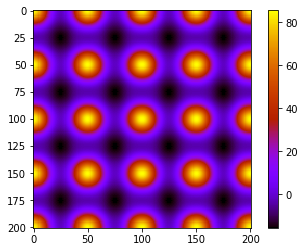

In [6]:
number = int(float(input("-1=< z =< 1 : "))*100+100)
plt.imshow(np.real(data[number]), cmap="gnuplot")
plt.colorbar()

-1=< z =< 1 : 0.5


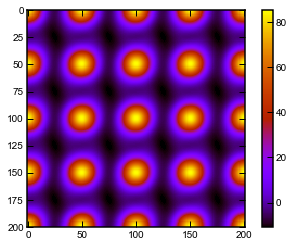

In [54]:
number = int(float(input("-1=< z =< 1 : "))*100+100)
plt.imshow(np.real(data[number]), cmap="gnuplot")
plt.colorbar()

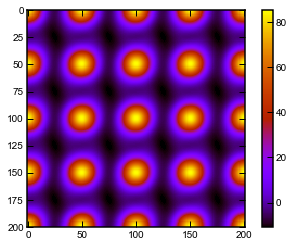

In [55]:
plt.imshow(np.real(p), cmap="gnuplot")
plt.colorbar()

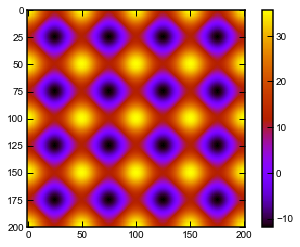

In [56]:
plt.imshow(np.real(p2),cmap="gnuplot")
plt.colorbar()

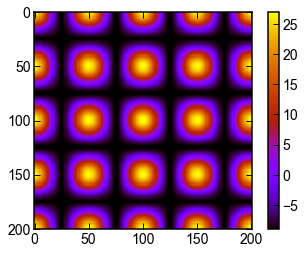

In [8]:
plt.imshow(np.real(p3),cmap="gnuplot")
plt.colorbar()

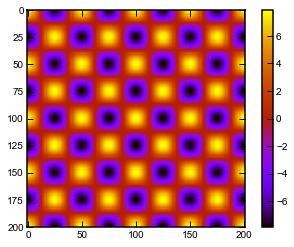

In [58]:
plt.imshow(np.real(p4),cmap="gnuplot")
plt.colorbar()

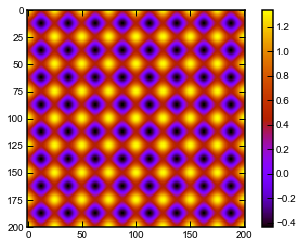

In [59]:
plt.imshow(np.real(p5),cmap="gnuplot")
plt.colorbar()

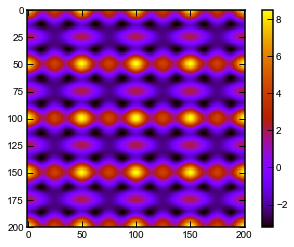

In [60]:
plt.imshow(np.real(p6),cmap="gnuplot")
plt.colorbar()

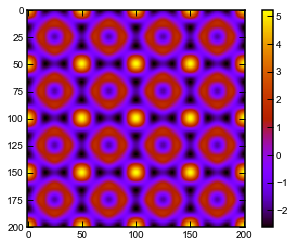

In [61]:
plt.imshow(np.real(p7),cmap="gnuplot")
plt.colorbar()

# プロット例

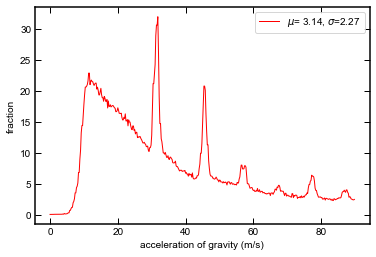

In [50]:
# -*- coding: utf-8 -*-
%matplotlib inline

# import
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from math import *

# data_input
df0 = pd.read_csv('0510_07_KCl.csv', header= 0)

angle = np.array(df0["Angle"])
intensity = np.array(df0["Intensity"])

# data plot
fig = plt.figure()
ax1 = fig.add_subplot(111)

x_mean = 3.14
x_ustd = 2.27

ax1.plot(angle, intensity, "r", label = "$\mu$= %.2f, $\sigma$=%.2f"%(x_mean, x_ustd))

ax1.set_xlabel("acceleration of gravity (m/s)")
ax1.set_ylabel("fraction")

plt.legend()
plt.show()
